In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Res 32 , B 16
B0
- min 2.134424
- max 15.317616
B1
- min 16.885115
- max 30.530123
B2
- min 33.090107
- max 62.322456
B3
- min 69.10478
- max 123.36682


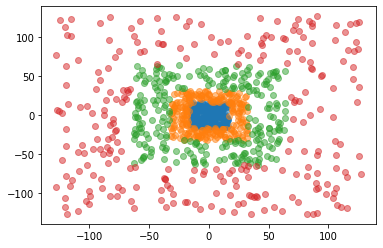

In [35]:
out_dim = 256
in_dim = 3

lam1 = 2

R = 512//(2**4)
B = R//2
print('Res',R, ', B', B)
gamma = torch.nn.Parameter(torch.distributions.uniform.Uniform(0, B).sample((out_dim, in_dim)))
# central simmetry
sign = torch.Tensor([[1,1,-1],[1,1,1],[1,-1,1],[1,-1,-1]])
idx = torch.multinomial(torch.ones(len(sign)).float(), num_samples=gamma.shape[0], replacement=True)
sign = sign[idx]
gamma = gamma * sign
gamma = gamma.detach().numpy()

plt.scatter(gamma[:,1], gamma[:,2], alpha=0.5, label='B0')
print('B0')
print('-','min', np.min(np.linalg.norm(gamma[:,1:], axis=1)))
print('-','max', np.max(np.linalg.norm(gamma[:,1:], axis=1)/np.sqrt(2), 0))


gamma = torch.nn.Parameter(torch.distributions.uniform.Uniform(0, B).sample((out_dim, in_dim)))
vect = torch.Tensor([[1, 1, 0],[1, 1, 1],[1, 0, 1]])
idx = torch.multinomial(torch.ones(len(vect)).float(), num_samples=gamma.shape[0], replacement=True)
vects = vect[idx]
gamma = gamma + B*vects
# central simmetry
sign = torch.Tensor([[0,1,-1],[0,1,1],[0,-1,1],[0,-1,-1]])
idx = torch.multinomial(torch.ones(len(sign)).float(), num_samples=gamma.shape[0], replacement=True)
sign = sign[idx]
gamma = gamma * sign
gamma = gamma.detach().numpy()

plt.scatter(gamma[:,1], gamma[:,2], alpha=0.5, label='B1')
print('B1')
print('-','min', np.min(np.linalg.norm(gamma[:,1:], axis=1)))
print('-','max', np.max(np.linalg.norm(gamma[:,1:], axis=1)/np.sqrt(2), 0))

B = 2*B
gamma = torch.nn.Parameter(torch.distributions.uniform.Uniform(0, B).sample((out_dim, in_dim)))
vect = torch.Tensor([[1, 1, 0],[1, 1, 1],[1, 0, 1]])
idx = torch.multinomial(torch.ones(len(vect)).float(), num_samples=gamma.shape[0], replacement=True)
vects = vect[idx]
gamma = gamma + B*vects
# central simmetry
sign = torch.Tensor([[0,1,-1],[0,1,1],[0,-1,1],[0,-1,-1]])
idx = torch.multinomial(torch.ones(len(sign)).float(), num_samples=gamma.shape[0], replacement=True)
sign = sign[idx]
gamma = gamma * sign
gamma = gamma.detach().numpy()

plt.scatter(gamma[:,1], gamma[:,2], alpha=0.5, label='B2')
print('B2')
print('-','min', np.min(np.linalg.norm(gamma[:,1:], axis=1)))
print('-','max', np.max(np.linalg.norm(gamma[:,1:], axis=1)/np.sqrt(2), 0))

B = 2*B
gamma = torch.nn.Parameter(torch.distributions.uniform.Uniform(0, B).sample((out_dim, in_dim)))
vect = torch.Tensor([[1, 1, 0],[1, 1, 1],[1, 0, 1]])
idx = torch.multinomial(torch.ones(len(vect)).float(), num_samples=gamma.shape[0], replacement=True)
vects = vect[idx]
gamma = gamma + B*vects
# central simmetry
sign = torch.Tensor([[0,1,-1],[0,1,1],[0,-1,1],[0,-1,-1]])
idx = torch.multinomial(torch.ones(len(sign)).float(), num_samples=gamma.shape[0], replacement=True)
sign = sign[idx]
gamma = gamma * sign
gamma = gamma.detach().numpy()

plt.scatter(gamma[:,1], gamma[:,2], alpha=0.5, label='B2')
print('B3')
print('-','min', np.min(np.linalg.norm(gamma[:,1:], axis=1)))
print('-','max', np.max(np.linalg.norm(gamma[:,1:], axis=1)/np.sqrt(2), 0))

s = 2*B+12
plt.xlim([-s,s])
plt.ylim([-s,s])
plt.show()

B1
- min 32.351574
- max 61.62676


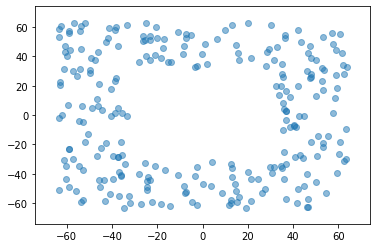

In [45]:
out_dim = 256
in_dim = 3

lam1 = 2

Bp = 32
Bw = 32

gamma = torch.nn.Parameter(torch.distributions.uniform.Uniform(0, Bw).sample((out_dim, in_dim)))
vect = torch.Tensor([[1, 1, 0],[1, 1, 1],[1, 0, 1]])
idx = torch.multinomial(torch.ones(len(vect)).float(), num_samples=gamma.shape[0], replacement=True)
vects = vect[idx]
gamma = gamma + Bp*vects
# central simmetry
sign = torch.Tensor([[0,1,-1],[0,1,1],[0,-1,1],[0,-1,-1]])
idx = torch.multinomial(torch.ones(len(sign)).float(), num_samples=gamma.shape[0], replacement=True)
sign = sign[idx]
gamma = gamma * sign
gamma = gamma.detach().numpy()

plt.scatter(gamma[:,1], gamma[:,2], alpha=0.5, label='B1')
print('B1')
print('-','min', np.min(np.linalg.norm(gamma[:,1:], axis=1)))
print('-','max', np.max(np.linalg.norm(gamma[:,1:], axis=1)/np.sqrt(2), 0))

s = Bw + Bp + 10
plt.xlim([-s,s])
plt.ylim([-s,s])
plt.show()

torch.Size([256])


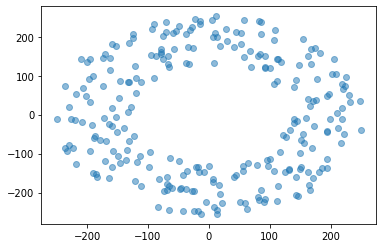

In [62]:
out_dim = 256
in_dim = 3
Bm = 128
Bw = 128

r_max = Bm + Bw
r_min = Bm

theta = torch.rand(out_dim)*2*np.pi
print(theta.shape)

A = 2/(r_max*r_max - r_min*r_min)
r = torch.sqrt(2*torch.rand(out_dim)/A + r_min*r_min)

gamma = torch.zeros([out_dim,2])
gamma[:,0] = r * torch.cos(theta)
gamma[:,1] = r * torch.sin(theta)

plt.scatter(gamma[:,0], gamma[:,1], alpha=0.5, label='B1')
plt.show()